<a href="https://colab.research.google.com/github/HazemHassine/Machine-Learning-Components/blob/master/LinearRegression_GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
# Initialise some parameters
x = np.random.randn(10,1) * 10
y = 5*x
# Parameters
w = 0.0 
b = 0.0 
# Hyperparameter 
learning_rate = 0.01

# Create gradient descent function
def descend(x, y, w, b, learning_rate): 
    dldw = 0.0 
    dldb = 0.0 
    N = x.shape[0]
    # loss = (y-(wx+b)))**2
    for xi, yi in zip(x,y): 
       dldw += -2*xi*(yi-(w*xi+b))
       dldb += -2*(yi-(w*xi+b))
    
    # Make an update to the w parameter 
    w = w - learning_rate*(1/N)*dldw
    b = b - learning_rate*(1/N)*dldb
    return w, b 

# Iteratively make updates
for epoch in range(800): 
    w,b = descend(x,y,w,b,learning_rate)
    yhat = w*x + b
    loss = np.divide(np.sum((y-yhat)**2, axis=0), x.shape[0]) 
    print(f'{epoch} loss is {loss}, paramters w:{w}, b:{b}')

0 loss is [48.8356892], paramters w:[5.90181701], b:[-0.20978083]
1 loss is [1.64244145], paramters w:[4.82854362], b:[-0.16774843]
2 loss is [0.08031161], paramters w:[5.02388638], b:[-0.17158711]
3 loss is [0.0276851], paramters w:[4.98849263], b:[-0.16715319]
4 loss is [0.02502749], paramters w:[4.9950624], b:[-0.16429293]
5 loss is [0.02405641], paramters w:[4.99399746], b:[-0.16121423]
6 loss is [0.02317347], paramters w:[4.99431871], b:[-0.15824179]
7 loss is [0.0223246], paramters w:[4.99438548], b:[-0.15531532]
8 loss is [0.02150689], paramters w:[4.99449622], b:[-0.15244458]
9 loss is [0.02071913], paramters w:[4.99459669], b:[-0.14962661]
10 loss is [0.01996023], paramters w:[4.9946968], b:[-0.14686078]
11 loss is [0.01922912], paramters w:[4.99479479], b:[-0.14414606]
12 loss is [0.0185248], paramters w:[4.99489101], b:[-0.14148153]
13 loss is [0.01784627], paramters w:[4.99498545], b:[-0.13886625]
14 loss is [0.01719259], paramters w:[4.99507815], b:[-0.13629932]
15 loss is

[array([4.99999994]), array([9.99999994]), array([14.99999993]), array([19.99999993]), array([24.99999993]), array([29.99999993]), array([34.99999993]), array([39.99999992]), array([44.99999992]), array([49.99999992])]


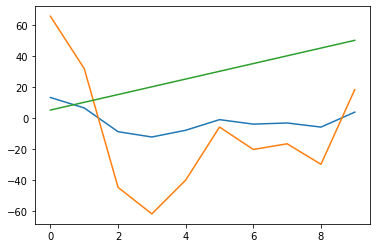

In [20]:
import matplotlib.pyplot as plt
line = [w*i+ b for i in range(1, len(x)+1)]
plt.plot(range(len(x)),x)
plt.plot(range(len(y)),y)
plt.plot(range(len(line)), np.array(line))